## Data ini memiliki :
- 1000 baris dan 6 kolom
- 5 fitur dan 1 target

## Korelasi 
- korelasi tertinggi adalah credit skor, yaitu -0.47 terhadap default (gagal bayar)
    yang artinya semakin tinggi kredit skor, maka semakin kecil gagal bayar
- korelasi tertinggi kedua adalah dependent(tanggungan) dengan skor = +0.41
    yang artinya semakin banyak tanggungan, maka semakin berpotensi default
- korelasi tertinggi ke-3 adalah income(pendapatan pertahun) dengan skor -0.21 terhadap default
    yang artinya semakin tinggi income, maka semakin kecil gagal bayar

## Akurasi Random Forest
- max depth = 5, n_estimators = 100 didapatkan akurasi 0.895

## Akurasi Decision Tree
- max depth = 5 didapatkan akurasi 0.865




In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan_default_prediction.csv')
df.head()
df_corr = pd.get_dummies(df, columns=['loan_default']).astype(int)
df_corr

,age,income,credit_score,dependents,home_owner,loan_default_0,loan_default_1
0,64,100000,583,3,0,1,0
1,45,16803,685,4,0,1,0
2,69,15418,498,2,0,1,0
3,63,11474,533,4,0,1,0
4,46,11536,454,0,1,1,0
...,...,...,...,...,...,...,...
995,63,40603,343,1,0,1,0
996,55,12785,432,3,1,1,0
997,36,8486,669,0,0,1,0
998,31,7013,305,2,0,0,1


                     age    income  credit_score  dependents  home_owner  \
age             1.000000  0.015841     -0.061318    0.004686    0.011072   
income          0.015841  1.000000     -0.014275   -0.026634    0.019620   
credit_score   -0.061318 -0.014275      1.000000   -0.016744   -0.000606   
dependents      0.004686 -0.026634     -0.016744    1.000000   -0.052004   
home_owner      0.011072  0.019620     -0.000606   -0.052004    1.000000   
loan_default_0  0.070913  0.213687      0.465904   -0.413792    0.181026   
loan_default_1 -0.070913 -0.213687     -0.465904    0.413792   -0.181026   

                loan_default_0  loan_default_1  
age                   0.070913       -0.070913  
income                0.213687       -0.213687  
credit_score          0.465904       -0.465904  
dependents           -0.413792        0.413792  
home_owner            0.181026       -0.181026  
loan_default_0        1.000000       -1.000000  
loan_default_1       -1.000000        1.000000  

<Axes: >

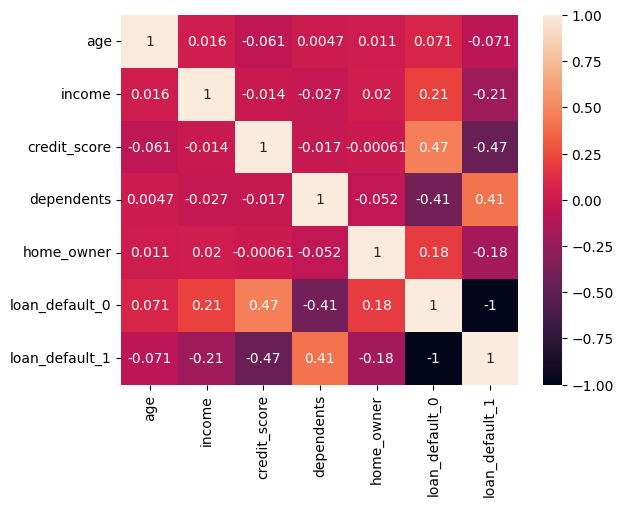

In [25]:
print(df_corr.corr())
sns.heatmap(df_corr.corr(),annot=True)

In [5]:
X = df.drop(columns='loan_default')
y = df['loan_default']

print(X,y)
df.dtypes

     age     income  credit_score  dependents  home_owner
0     64  100000.00           583           3           0
1     45   16803.24           685           4           0
2     69   15418.51           498           2           0
3     63   11474.46           533           4           0
4     46   11536.00           454           0           1
..   ...        ...           ...         ...         ...
995   63   40603.74           343           1           0
996   55   12785.96           432           3           1
997   36    8486.72           669           0           0
998   31    7013.55           305           2           0
999   24   16358.32           569           3           1

[1000 rows x 5 columns] 0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: loan_default, Length: 1000, dtype: int64


age               int64
income          float64
credit_score      int64
dependents        int64
home_owner        int64
loan_default      int64
dtype: object

In [7]:
# split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(max_depth = 5, random_state=1, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Akurasi : {accuracy_score(y_test, y_pred_rf)}')
print(f'Klasifikasi report : {classification_report(y_test, y_pred_rf)}')

dt = DecisionTreeClassifier(max_depth = 5, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f'Akurasi : {accuracy_score(y_test, y_pred_dt)}')
print(f'Klasifikasi report : {classification_report(y_test, y_pred_dt)}')


Akurasi : 0.895
Klasifikasi report :               precision    recall  f1-score   support

           0       0.91      0.97      0.94       161
           1       0.82      0.59      0.69        39

    accuracy                           0.90       200
   macro avg       0.86      0.78      0.81       200
weighted avg       0.89      0.90      0.89       200

Akurasi : 0.865
Klasifikasi report :               precision    recall  f1-score   support

           0       0.91      0.93      0.92       161
           1       0.67      0.62      0.64        39

    accuracy                           0.86       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.86      0.86      0.86       200

